In [89]:
import xgi
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
valid_datasets = ["coauth-mag-geology",
"coauth-mag-history",
"congress-bills",
"contact-high-school",
"contact-primary-school",
"diseasome",
"disgenenet",
"email-enron",
"email-eu",
"hospital-lyon",
"ndc-substances",
"tags-ask-ubuntu",
"tags-math-sx",
"tags-stack-exchange"]

In [5]:
from tqdm import tqdm 
H, min_size, max_size, N = {}, {}, {}, {}
from collections import defaultdict
from collections import Counter
from scipy.special import comb
pls = defaultdict(list)

for dataset in tqdm(valid_datasets):
    print(dataset)
    H[dataset] = xgi.load_xgi_data(dataset, cache=False)
    simpleH = H[dataset].copy()
    simpleH.merge_duplicate_edges()
    s = simpleH.edges.size
    min_size[dataset] = s.min()
    max_size[dataset] = s.max()
    N[dataset] = simpleH.num_nodes
    cl = Counter(simpleH.edges.order.asdict().values())
    for l in cl:
        pl = (cl[l], N[dataset])
        pls[l+1].append(pl)

  0%|                                                                                                                                                                                                                                  | 0/14 [00:00<?, ?it/s]

coauth-mag-geology


  7%|███████████████▌                                                                                                                                                                                                          | 1/14 [01:16<16:28, 76.01s/it]

coauth-mag-history


 14%|███████████████████████████████▏                                                                                                                                                                                          | 2/14 [02:34<15:30, 77.50s/it]

congress-bills


 21%|██████████████████████████████████████████████▋                                                                                                                                                                           | 3/14 [02:48<08:52, 48.42s/it]

contact-high-school


 29%|██████████████████████████████████████████████████████████████▎                                                                                                                                                           | 4/14 [02:53<05:12, 31.26s/it]

contact-primary-school


 36%|█████████████████████████████████████████████████████████████████████████████▊                                                                                                                                            | 5/14 [02:59<03:20, 22.25s/it]

diseasome


 43%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                            | 6/14 [03:01<02:01, 15.22s/it]

disgenenet


 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                             | 7/14 [03:02<01:14, 10.66s/it]

email-enron


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 8/14 [03:03<00:45,  7.54s/it]

email-eu


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 9/14 [03:11<00:38,  7.73s/it]

hospital-lyon


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 10/14 [03:14<00:25,  6.32s/it]

ndc-substances


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 11/14 [03:19<00:17,  5.96s/it]

tags-ask-ubuntu


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 12/14 [03:28<00:13,  6.75s/it]

tags-math-sx


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 13/14 [04:06<00:16, 16.15s/it]

tags-stack-exchange


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 13/14 [04:07<00:19, 19.06s/it]


XGIError: Error: HTTP response {r.status_code}

# Scaling t versus N

We measure here the maximum size of the hyperedges $t$ versus the number of hyperedges $N$.

We plot below $\log t$ vs  $\log N$. 
The regression of the two corresponds to the functional form:  
$\log t \sim a + b \log N$,  
thus  
$t \sim a N^b$


regression results LinregressResult(slope=0.17137512305809197, intercept=1.8171164511155515, rvalue=0.27726575297769707, pvalue=0.3590739908863745, stderr=0.17905446610329429, intercept_stderr=1.5069354029266864)


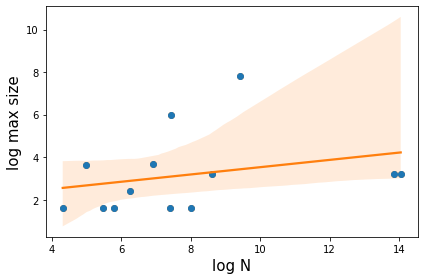

In [91]:
ns = [N[x] for x in H.keys()]
maxs = [max_size[x] for x in H.keys()]

plt.plot(np.log(ns), np.log(maxs), 'o')
plt.xlabel('log N', fontsize=15)
plt.ylabel('log max size', fontsize=15)
sns.regplot(np.log(ns), np.log(maxs))
from scipy.stats import linregress
print("regression results", linregress(np.log(ns), np.log(maxs)))
plt.tight_layout()

Based on the scaling from the regression we find a sublinear scaling exponent $t \sim N^{0.17}$

# Scaling $p_l$ versus $l$

## $p_l$ as a function of $N$

Similarly, we can estimate the dependence of $p_l$ on $l$ and $N$. 
Below I show the results aggregated for a set of hypegraphs by estimating $p_l$ as  $\frac{m_l}{\binom{N}{l}}$ (basically inverting Eq. 11 in the paper). 



All the plots below are $\log p_l$ vs $\log N$. 
The linear (or linear enough scaling we find) point to a power-law dependence of $p_l \sim C_l N^{\beta_l}$. 

Here shown only for $l\leq20$

/Users/lordgrilo/.virtualenvs/stenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


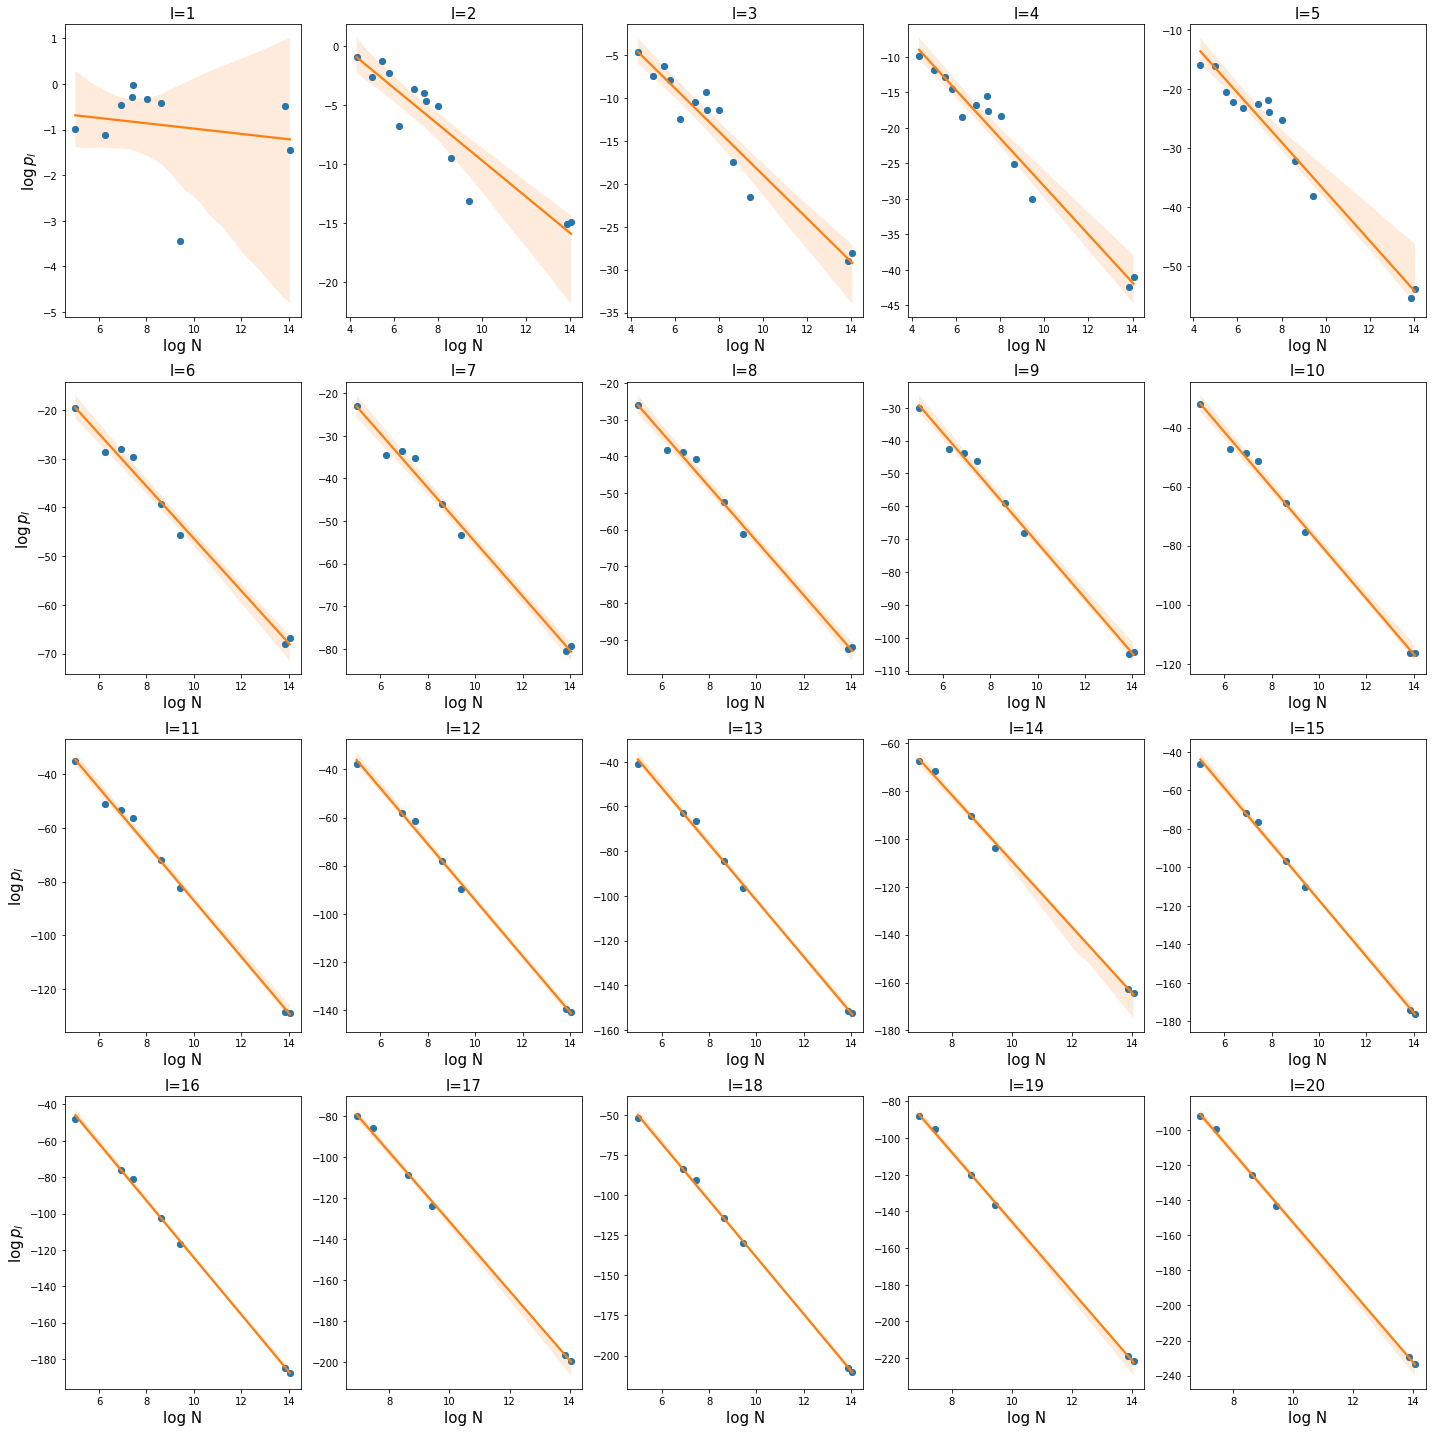

In [100]:
fig = plt.figure(figsize=(20,20))
from sklearn import  linear_model;

regr = {}
for l in range(1,21):
    
    if l in pls:
        xs, ys = [], [];
        plt.subplot(4,5,l);
        plt.title('l='+str(l), fontsize=15);
        for c in pls[l]:
            ys.append(c[0]/comb(c[1], l));
            xs.append(c[1]);
        plt.plot(np.log(xs), np.log(ys), 'o');
        plt.xlabel('log N', fontsize=15);
        sns.regplot(np.log(xs), np.log(ys));
        if l%5==1:
            plt.ylabel(r'$\log p_l$', fontsize=15);
        regr[l] = linregress(np.log(xs), np.log(ys));
plt.tight_layout();
plt.savefig('pl-scaling-n.pdf')

## $\beta_l$ as a function of $l$ 

/Users/lordgrilo/.virtualenvs/stenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


slope LinregressResult(slope=-1.0349083784749609, intercept=0.817790460353752, rvalue=-0.9997806747840342, pvalue=1.114292385110469e-31, stderr=0.005109711487386866, intercept_stderr=0.06120999295868142)
slope LinregressResult(slope=2.3939648088437426, intercept=-5.278108550400582, rvalue=0.9783415116789653, pvalue=9.208352145655239e-14, stderr=0.11938664029822525, intercept_stderr=1.430150299102733)


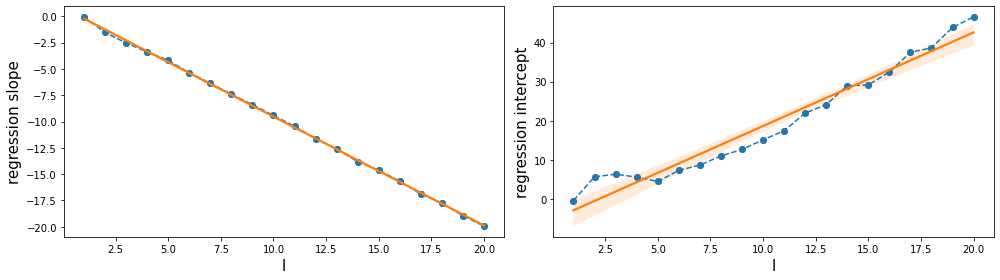

In [101]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
plt.plot(range(1,21), [regr[l].slope for l in range(1,21)], 'o--')
plt.xlabel('l', fontsize=15)
sns.regplot(np.array(range(1,21)), np.array([regr[l].slope for l in range(1,21)]));
plt.ylabel('regression slope', fontsize=15);
print('slope', linregress(range(1,21), [regr[l].slope for l in range(1,21)]));
      
plt.subplot(122)
plt.plot(range(1,21), [regr[l].intercept for l in range(1,21)], 'o--');
plt.xlabel('l', fontsize=15);
sns.regplot(np.array(range(1,21)), np.array([regr[l].intercept for l in range(1,21)]));
plt.ylabel('regression intercept', fontsize=15);
print('slope', linregress(range(1,21), [regr[l].intercept for l in range(1,21)]));
plt.tight_layout();
plt.savefig('regression-pl-scaling-n.pdf');

We find linear scalings of both $\beta_l$ and $C_l$.  